### Load Necessary Libraries

In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

### Dataset Loading and Preprocessing

In [3]:
TRAIN_DIR = 'C:\\Users\\gupte\\OneDrive\\Desktop\\Face Detection\\train'
TEST_DIR = 'C:\\Users\\gupte\\OneDrive\\Desktop\\Face Detection\\test'

In [5]:
def createdataframe(dir):    
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(train)

                                                   image     label
0      C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
1      C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
2      C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
3      C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
4      C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
...                                                  ...       ...
28816  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise
28817  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise
28818  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise
28819  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise
28820  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise

[28821 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
1     C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
2     C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
3     C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
4     C:\Users\gupte\OneDrive\Desktop\Face Detection...     angry
...                                                 ...       ...
7061  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise
7062  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise
7063  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise
7064  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise
7065  C:\Users\gupte\OneDrive\Desktop\Face Detection...  surprise

[7066 rows x 2 columns]
0       C:\Users\gupte\OneDrive\Desktop\Face Detection...
1       C:\Users\gupte\OneDrive\Desktop\Face Detection...
2       C:\Users\gupte\OneDrive\Desktop\Face Detection...
3       C

In [10]:
from tqdm.notebook import tqdm # Importing the tqdm library for progress  visualization

In [11]:
def extract_features(images): ##Function to extract features from the images dataset
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [12]:
train_features = extract_features(train['image']) # Extract features for training data

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\gupte\AppData\Roaming\Python\Python311\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [13]:
test_features = extract_features(test['image']) #Extract features for test data

  0%|          | 0/7066 [00:00<?, ?it/s]

In [14]:
x_train = train_features/255.0
x_test = test_features/255.0     # Normalize the feature values to range

In [15]:
from sklearn.preprocessing import LabelEncoder # Importing LabelEncoder for converting categorical labels to numerical values

In [16]:
le = LabelEncoder()
le.fit(train['label'])    #Fit LabelEncoder on the training labels

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])      #Transform the training and test labels from categorical to numerical
y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train,num_classes = 7)   # Convert the numerical labels to one-hot encoded vectors
y_test = to_categorical(y_test,num_classes = 7)

### Model Architecture

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\gupte\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the Model

In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))   

Epoch 1/100
 10/226 ━━━━━━━━━━━━━━━━━━━━ 8:11 2s/step - accuracy: 0.1989 - loss: 1.9178

KeyboardInterrupt: 

In [22]:
model_json = model.to_json()
with open("detector.json",'w') as json_file:
    json_file.write(model_json)
model.save("detector.h5")

In [23]:
from keras.models import model_from_json

In [24]:
json_file = open("emotiondetector.json", "r")     #Save  model architecture to JSON file and weights to an H5 file for future use
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)      #Load the saved model architecture
model.load_weights("emotiondetector.h5")

In [25]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']   #labels corresponding to emotions in the dataset

In [26]:
def ef(image):                                # Function to preprocess an image before feeding it into the model
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

### Example predictions with different images and showing the model's predictions

In [28]:
image = 'C:\\Users\\gupte\\OneDrive\\Desktop\\Face Detection\\train\\fear\\5.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
model prediction is  neutral


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
model prediction is  sad


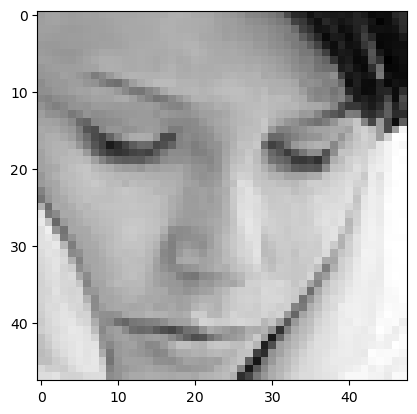

In [32]:
image = "C:\\Users\\gupte\\OneDrive\\Desktop\\Face Detection\\train\\sad\\42.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
model prediction is  fear


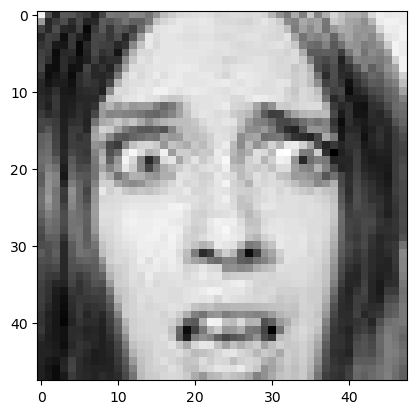

In [34]:
image = "C:\\Users\\gupte\\OneDrive\\Desktop\\Face Detection\\train\\fear\\96.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
model prediction is  disgust


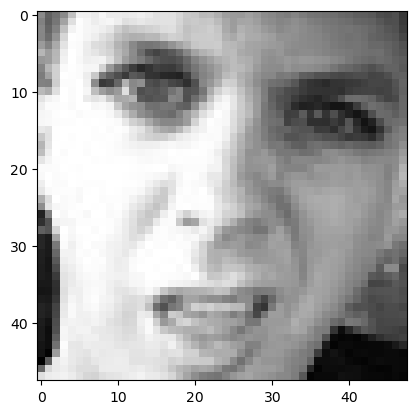

In [35]:
image = "C:\\Users\\gupte\\OneDrive\\Desktop\\Face Detection\\train\\disgust\\1661.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
model prediction is  happy


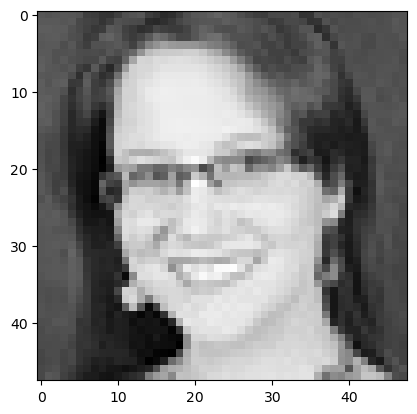

In [36]:
image = "C:\\Users\\gupte\\OneDrive\\Desktop\\Face Detection\\train\\happy\\7.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
model prediction is  surprise


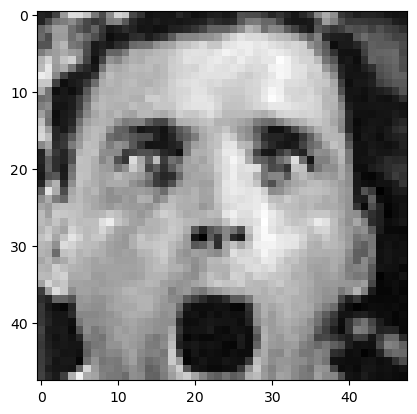

In [37]:
image = "C:\\Users\\gupte\\OneDrive\\Desktop\\Face Detection\\train\\surprise\\29.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')